In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib
import warnings
#warnings.filterwarnings("ignore")

Using matplotlib backend: Qt5Agg


In [199]:
data = pd.read_csv('train_small.csv')

In [3]:
data.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [4]:
data.shape

(2380557, 54)

## Exploring Data

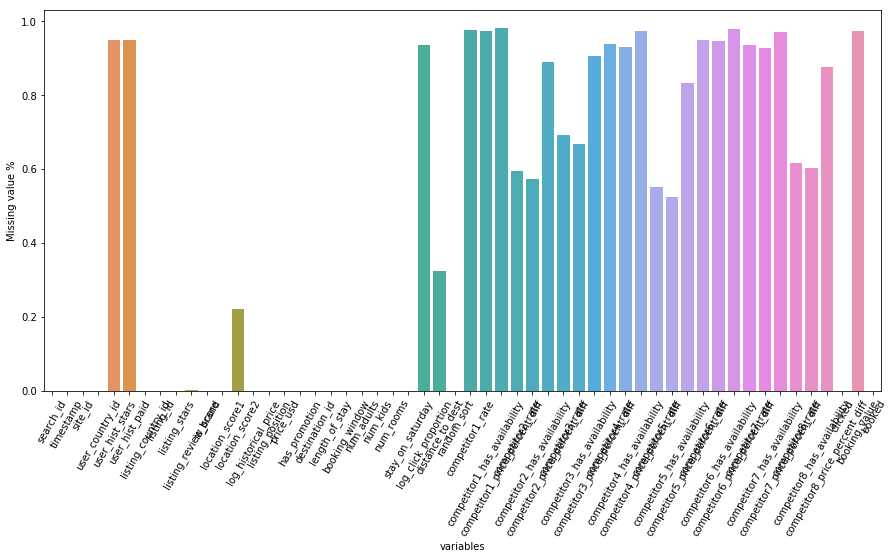

In [60]:
#Missing values
plt.figure(figsize=(15,7))
g=sns.barplot((data.isna().sum()/data.shape[0]).index,(data.isna().sum()/data.shape[0]).values)
g.set(xlabel='variables',ylabel="Missing value %")
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

Over half the variables have >50% missing values

In [6]:
continuous = ['user_hist_stars','user_hist_paid','listing_stars','listing_review_score','location_score1','location_score2',
    'log_historical_price','listing_position','price_usd','length_of_stay','booking_window','num_adults','num_kids',
      'num_rooms','log_click_proportion','distance_to_dest','booking_value']    

categorical = ['booked','clicked','random_sort','stay_on_saturday','destination_id','has_promotion','is_brand',
               'listing_country_id','user_country_id','site_id','listing_id']

print(len(continuous),len(categorical))

17 11


In [7]:
data[continuous].describe()

,user_hist_stars,user_hist_paid,listing_stars,listing_review_score,location_score1,location_score2,log_historical_price,listing_position,price_usd,length_of_stay,booking_window,num_adults,num_kids,num_rooms,log_click_proportion,distance_to_dest,booking_value
count,122780.000000,123494.000000,2.380557e+06,2.377071e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,66388.000000
mean,3.382814,178.094940,3.180607e+00,3.779416e+00,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,-24.398076,1.315759e+03,383.229069
std,0.694562,108.568025,1.052086e+00,1.049727e+00,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,16.129689,2.029315e+03,527.019882
min,1.500000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-326.567500,1.000000e-02,0.000000
25%,2.950000,111.090000,3.000000e+00,3.500000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,-31.267400,1.427400e+02,124.150000
50%,3.450000,152.620000,3.000000e+00,4.000000e+00,2.770000e+00,6.940000e-02,4.910000e+00,1.600000e+01,1.222500e+02,2.000000e+00,1.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,-20.440800,3.923000e+02,219.185000
75%,3.950000,215.950000,4.000000e+00,4.500000e+00,4.060000e+00,1.810000e-01,5.310000e+00,2.600000e+01,1.853100e+02,3.000000e+00,4.900000e+01,2.000000e+00,0.000000e+00,1.000000e+00,-13.498000,1.526180e+03,432.125000
max,5.000000,1507.120000,5.000000e+00,5.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,5.700000e+01,4.980000e+02,9.000000e+00,9.000000e+00,8.000000e+00,-3.099500,1.163779e+04,20238.720000


In [148]:
plt.rcParams['figure.figsize'] = 15, 15
def plot_histograms(nrow,ncol):
    for i,col in enumerate(continuous):
        sp = plt.subplot(nrow,ncol,i+1)
        data[col]=pd.to_numeric(data[col],errors='coerce')      
        sns.distplot(data[col].dropna(),kde=False,ax=sp)
    #plt.figure(figsize=(18,12)) 
    plt.suptitle("Histograms for continuous data",y=1)
    plt.tight_layout()    
    plt.show()   

/home/divyansh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


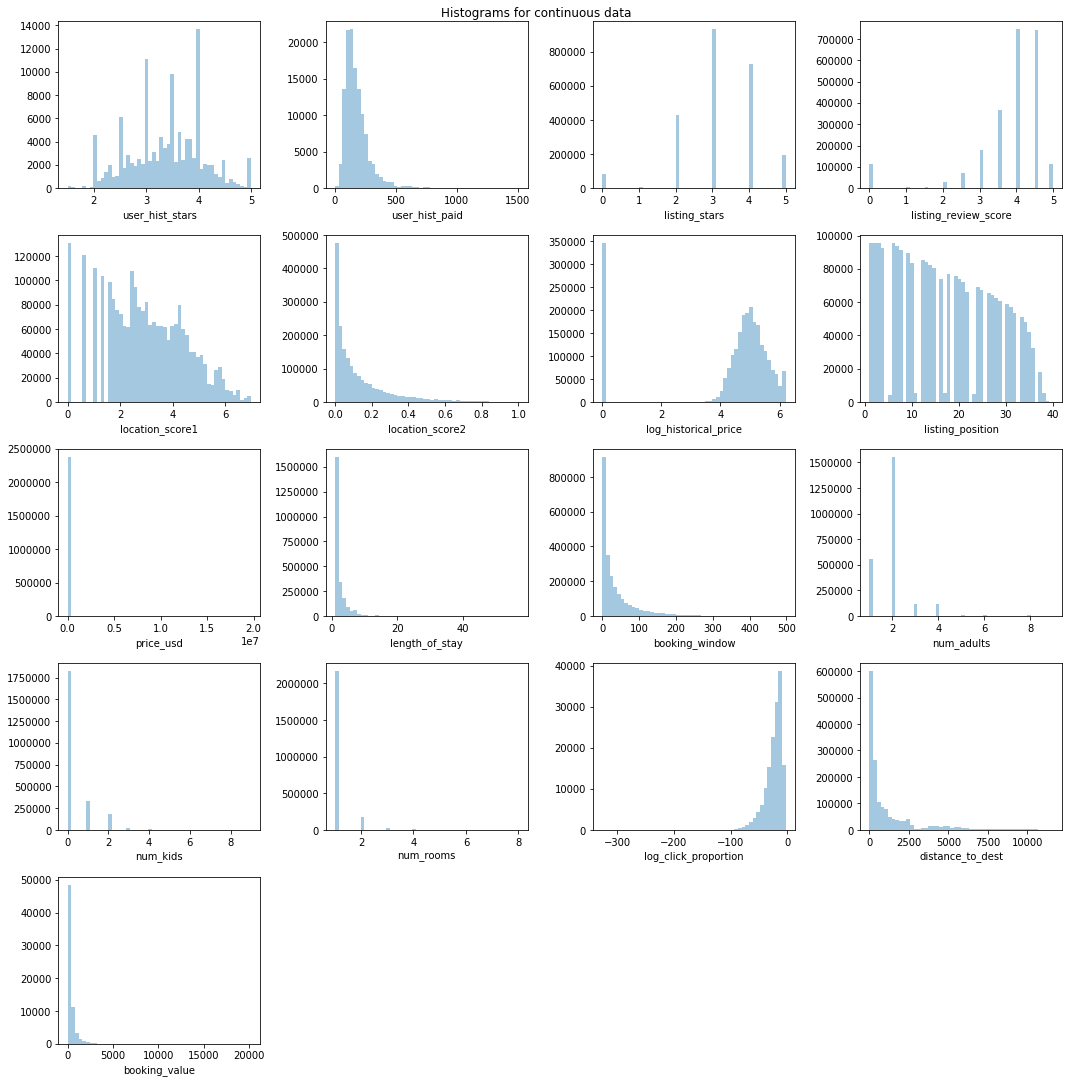

In [149]:
plot_histograms(5,4)

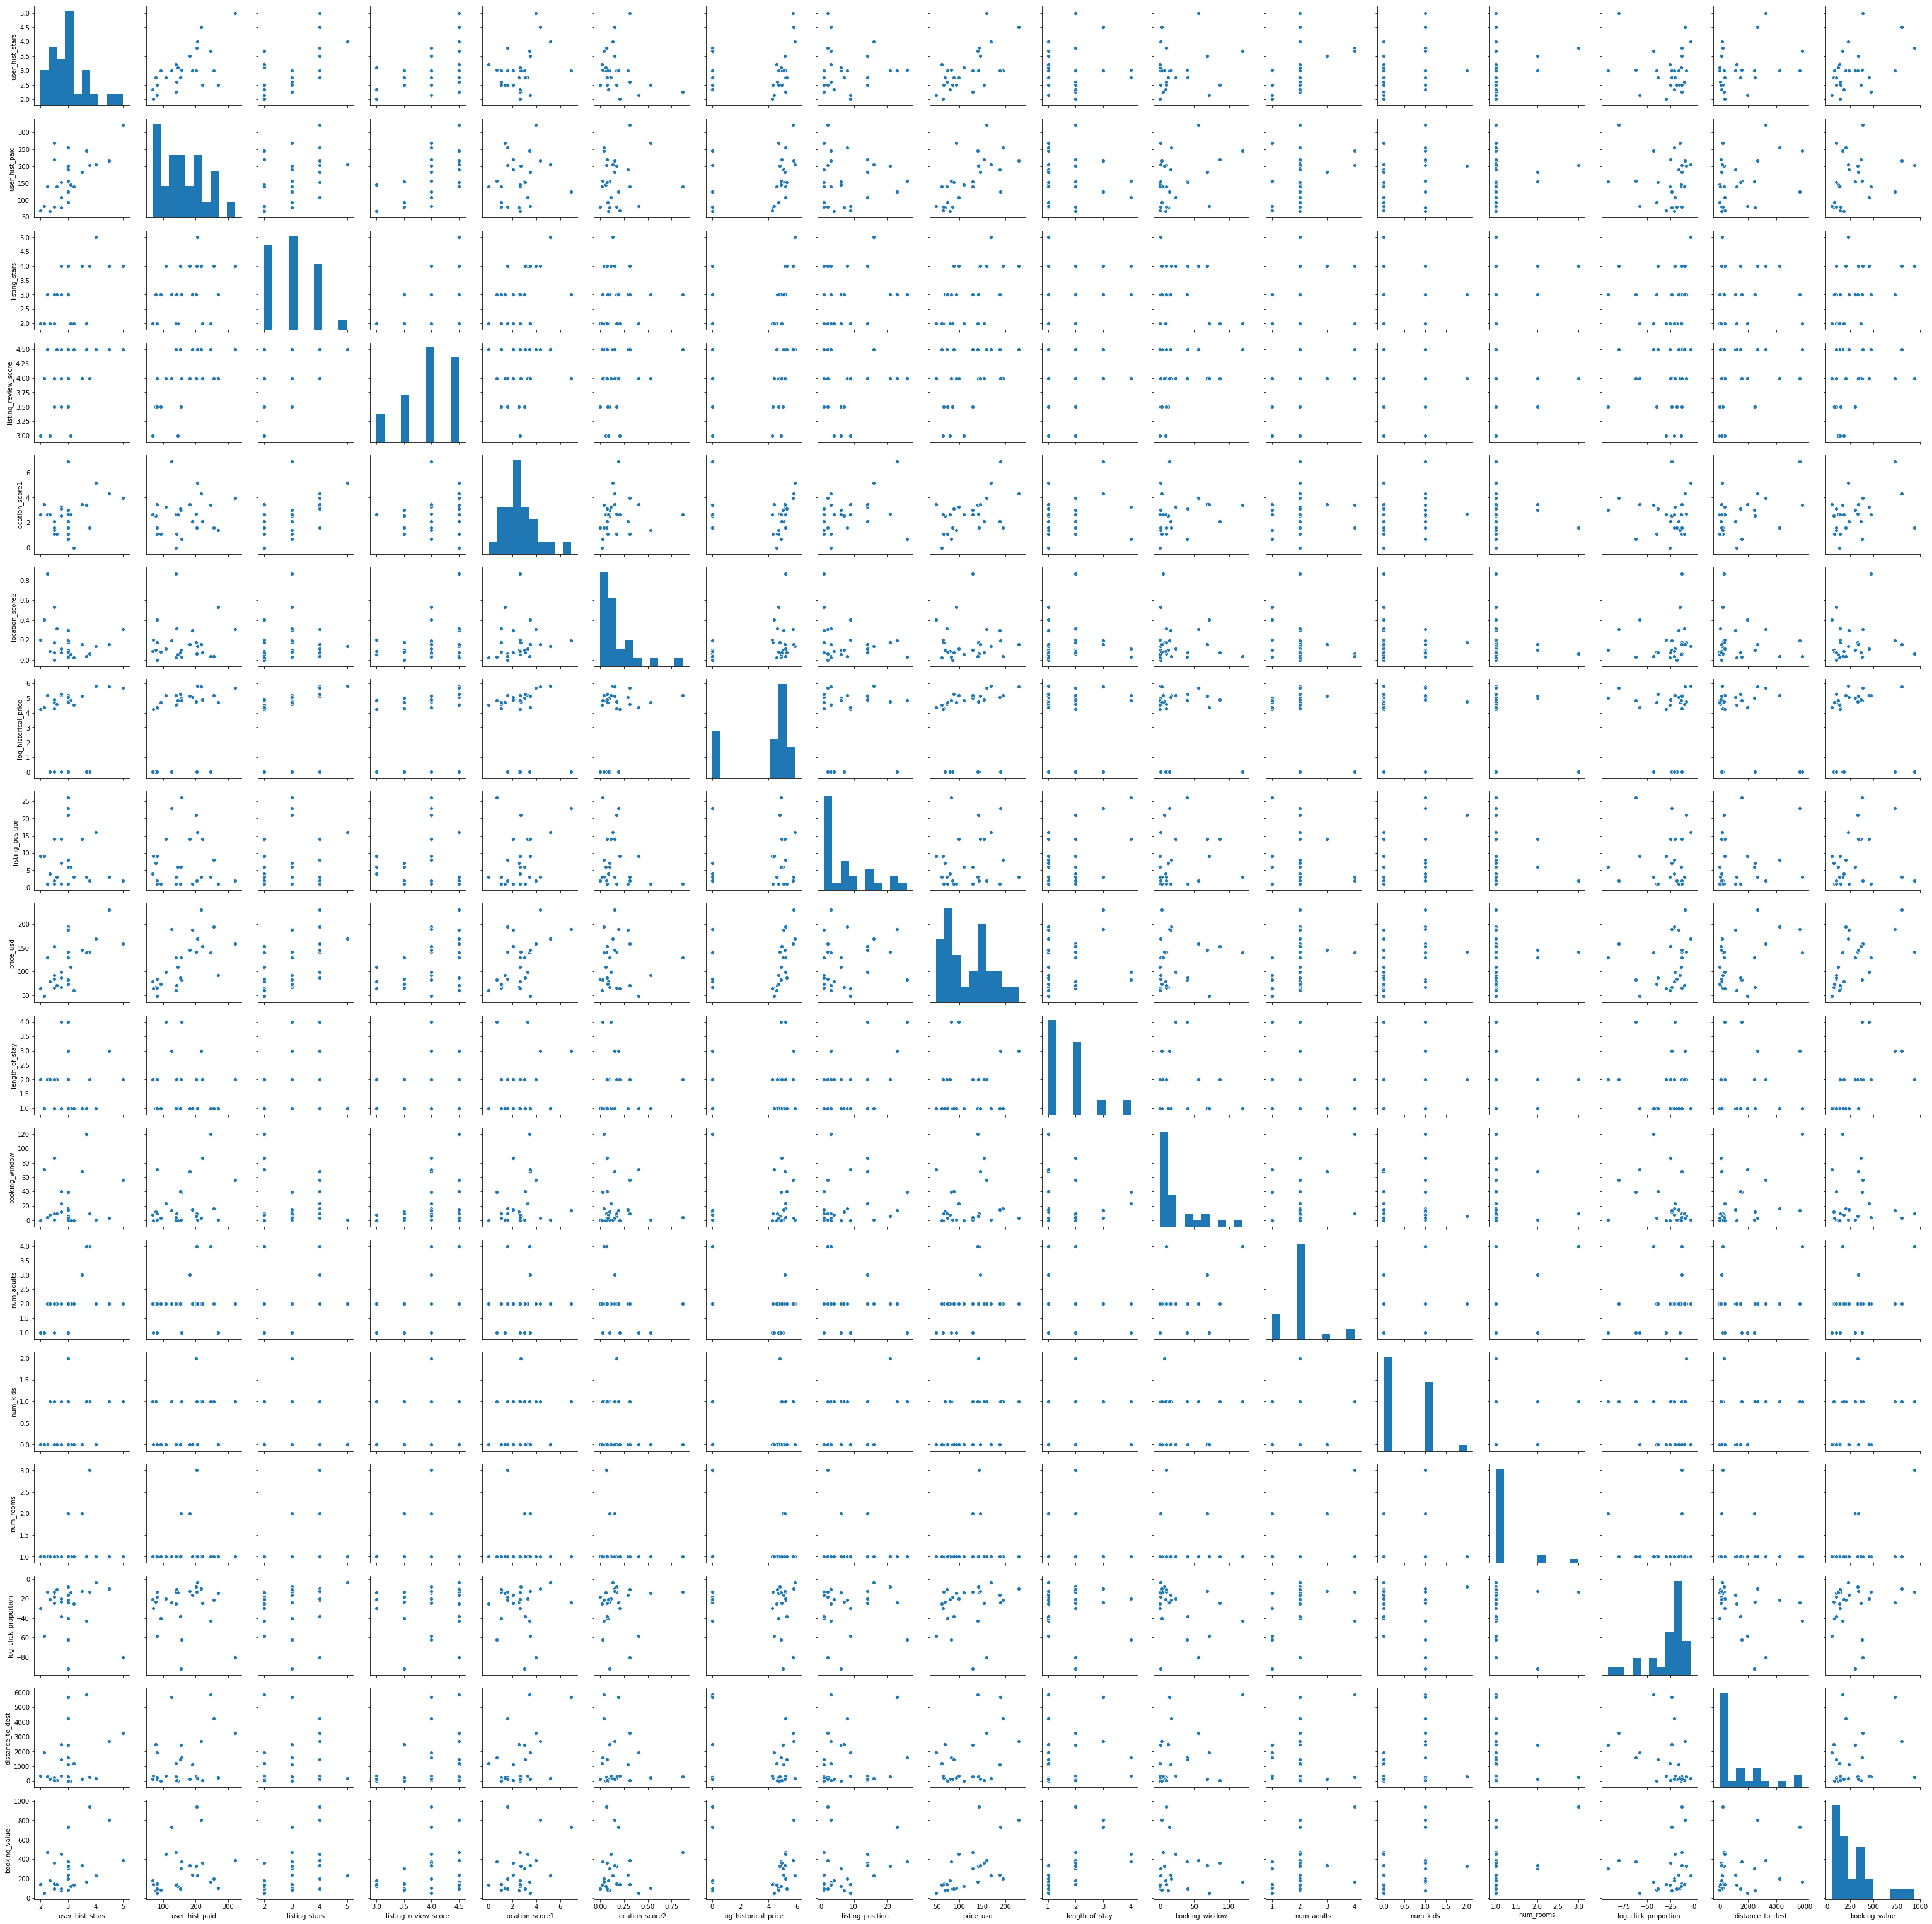

In [85]:
sns.pairplot(data[continuous].dropna())


Some variables exhibit collinearity, this causes p-values to inflate when performing regression analysis. It causes instability in the model.
We can treat multicollinearity by eliminating variables one at a time with condition: VIF(Variance Inflation Factor)>5
Lasso regression, and to some extent, ridge regression can also help lower it's effect

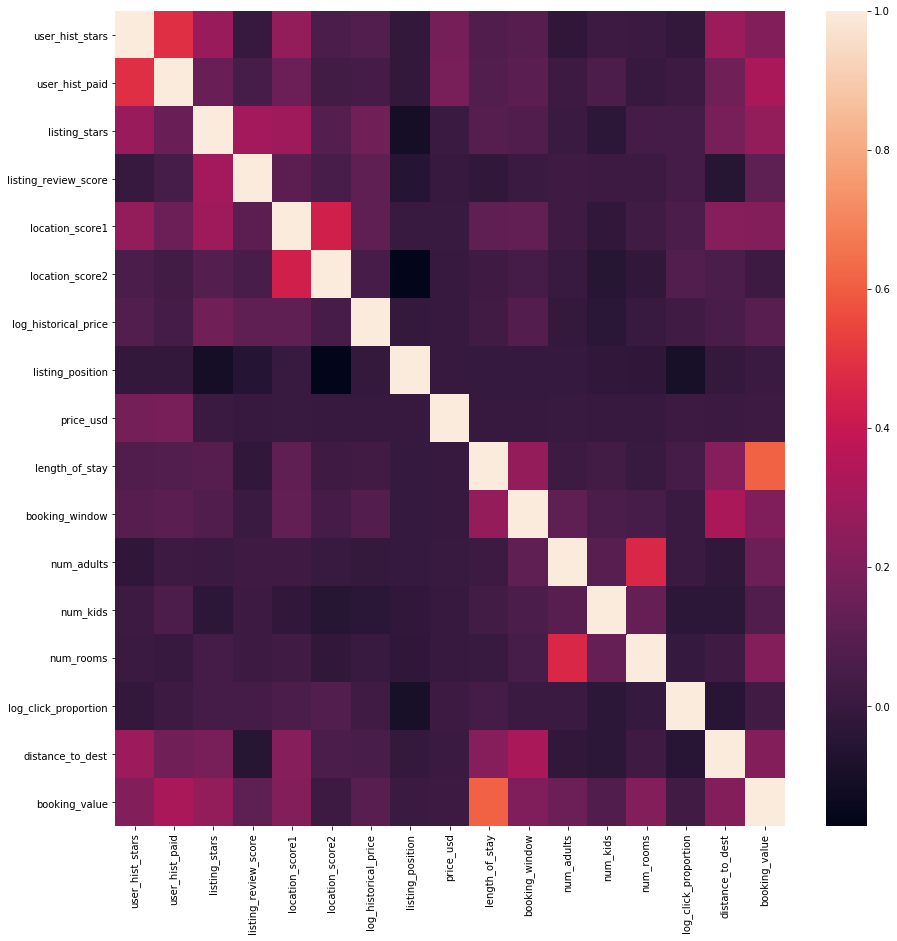

In [86]:
sns.heatmap(data[continuous].corr())

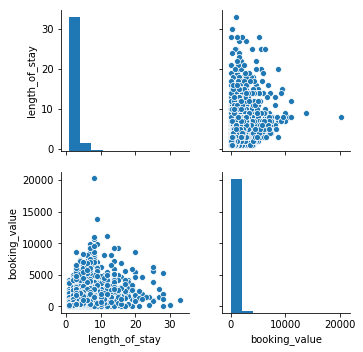

In [102]:
var=((data[continuous].corr()['booking_value']>0.5)[(data[continuous].corr()['booking_value']>0.5).values]).index
sns.pairplot(data[var].dropna())

In [39]:
def plot_countplots(myhue,nrow,ncol):
    for i,col in enumerate(categorical1):
        sp = plt.subplot(nrow,ncol,i+1)
        #data[col]=pd.to_numeric(data[col],errors='coerce')      
        sns.countplot(data[col],hue=myhue,orient='h',ax=sp)
    #plt.figure(figsize=(18,12))  
    plt.suptitle('Countplots for categorical data',y=1)
    plt.tight_layout()    
    plt.show()   

In [12]:
categorical1=pd.Series(categorical)[(data[categorical].nunique()<50).values].values
categorical2=pd.Series(categorical)[(data[categorical].nunique()>=50).values].values

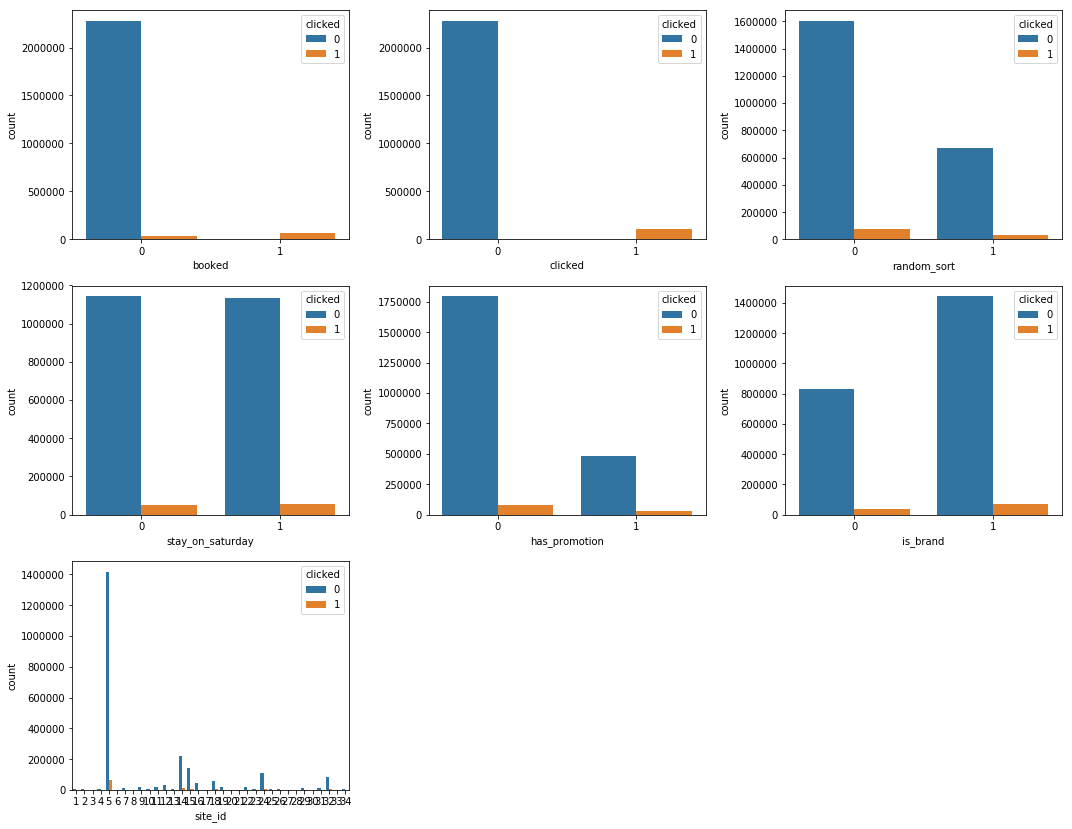

In [41]:
#plot_countplots(data['booked'],3,4)
plot_countplots(data['clicked'],4,3)

- Clicks and bookings are fairly evenly distributed among categorical variables, giving no significant evidence of their importance <br>
- There is a huge gap between number of bookings/clicks and no-bookings/no-clicks. This makes the classification task highly imbalanced. <br>
- This can be treated by synthetically generating data for less poplulated class (booked/clicked) using techniques like SMOTE, or undersampling majority class (not-booked) <br>
- Instead of evaluating our model on accuracy, we use F1 score, ROC curve or Precision-Recall curve
This gives a more balanced approach to evaluate our model, because accuracy could be very high even if the model makes the same prediction for all data (due to class imbalance)  

In [94]:
# Top 5 destination_id, listing_country_id, user_country_id, listing_id, site_id
for col in list(categorical2)+['site_id']:
    print(data[col].value_counts()[:5])

8192     33759
4562     27917
9402     18629
10979    17107
13292    15567
Name: destination_id, dtype: int64
219    1453640
100     147465
55       88802
31       76562
99       65434
Name: listing_country_id, dtype: int64
219    1390167
100     237213
55      140462
216     104127
220      84940
Name: user_country_id, dtype: int64
104517    1148
124342    1133
137997    1104
60846     1098
59781     1091
Name: listing_id, dtype: int64
5     1482057
14     229647
15     149346
24     114741
32      86394
Name: site_id, dtype: int64


- listing_country_id and site_id have high disparity in their distributions, with the top one overshadowing the rest 

In [80]:
plt.rcParams['figure.figsize'] = 15, 15
def plot_boxplots(nrow,ncol,myhue):
    cols=[col for col in data.columns if 'competitor' in col]
    for i,col in enumerate(cols):
        sp=plt.subplot(nrow,ncol,i+1)
        sns.boxplot(x=col,y=myhue, orient='h',data=data, ax=sp)
    plt.suptitle('Boxplots for competitors',y=1)
    plt.tight_layout()
    plt.show()    

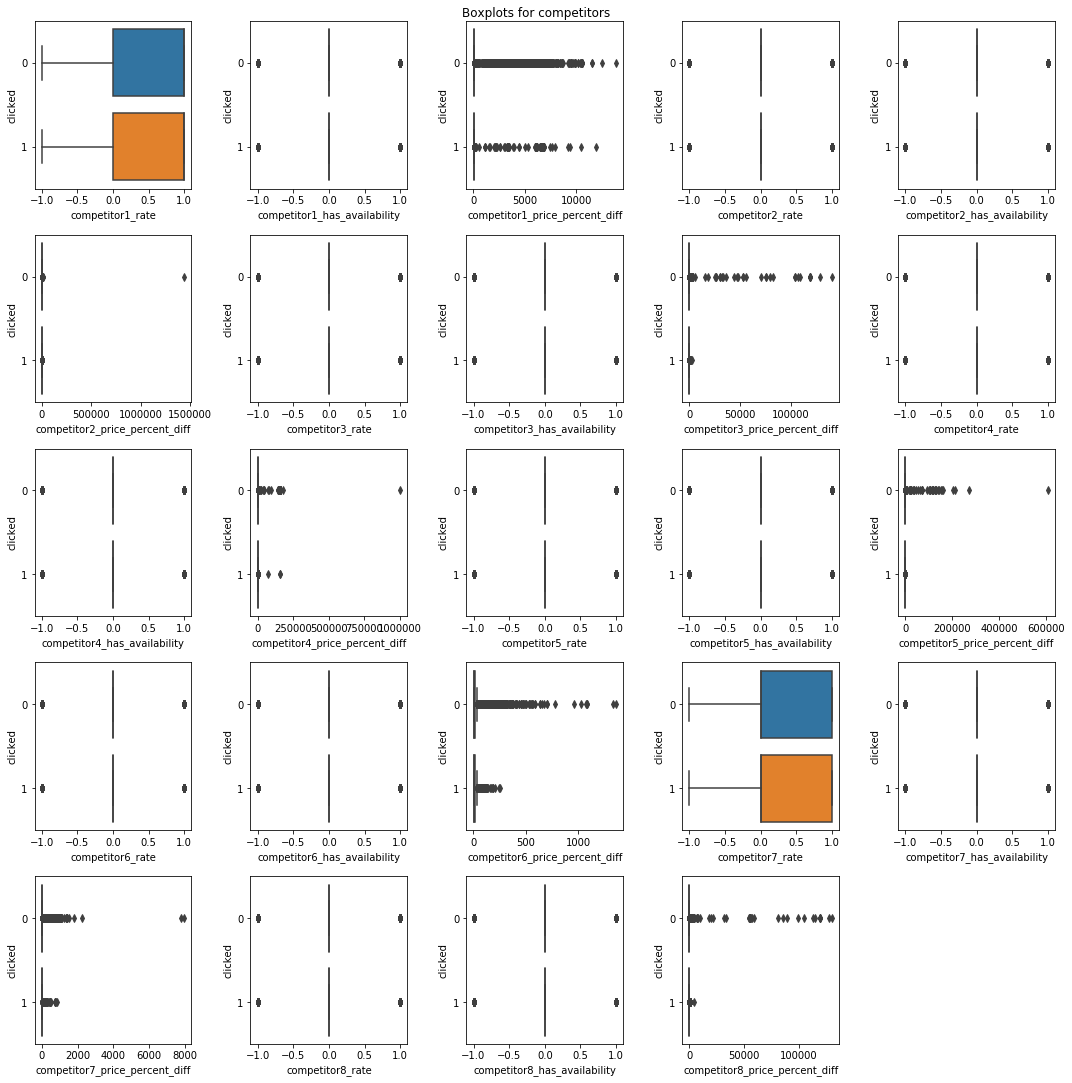

In [83]:
#plot_boxplots(5,5,"booked")
plot_boxplots(5,5,"clicked")

- By inspection, the following variables appear significant: <br>
competitor_1_price_percent_diff, competitor_3_price_percent_diff, competitor_4_price_percent_diff, competitor_5_price_percent_diff, competitor_6_price_percent_diff, competitor_7_price_percent_diff,
competitor_8_price_percent_diff

In [128]:
data1=data.copy()
data1['timestamp'] = pd.to_datetime(data1['timestamp'])

def plot_timestamp(data1,target='book',overall_flag=1,dayofmonth_flag=0,hour_flag=0,weekly_flag=0):
    if overall_flag==1:
        data1.groupby('timestamp').agg({target+'ed':'sum'}).plot(figsize=(12,6))
        plt.ylabel('Number of '+target+'ed')
        plt.title('Number of '+target+'ed by impression time')
        plt.show()

    if dayofmonth_flag==1:
        data1['day_of_month'] = data1['timestamp'].apply(lambda x: x.day)
        data1.groupby('day_of_month').agg({'booked':'sum'}).plot(figsize=(12,6))
        plt.ylabel('Number of '+target+'ed')
        plt.title('Number of '+target+'ings by day of month')
        plt.show()

    if hour_flag==1:
        data1['hour_of_day'] = data1['timestamp'].apply(lambda x: x.hour)
        data1.groupby('hour_of_day').agg({target+'ed':'sum'}).plot(figsize=(12,6))
        plt.ylabel('Number of '+target+'ings')
        plt.title('Number of '+target+'ings by hour of day')
        plt.show()

        data1.groupby(['hour_of_day', ''+target+'ed']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
        plt.ylabel('count')
        plt.title('Hourly impressions vs. '+target+'ed')
        plt.show()
        
        df_book = data1.loc[data1[target+'ed'] == 1]
        df_hour = data1[['hour_of_day',target+'ed']].groupby(['hour_of_day']).count().reset_index()
        df_hour = df_hour.rename(columns={target+'ed': 'impressions'})
        df_hour[target+'ings'] = df_book[['hour_of_day',target+'ed']].groupby(['hour_of_day']).count().reset_index()[target+'ed']
        df_hour[target+'ingRate'] = df_hour[target+'ings']/df_hour['impressions']*100
        plt.figure(figsize=(12,6))
        sns.barplot(y=target+'ingRate', x='hour_of_day', data=df_hour)
        plt.title('Hourly '+target+'ingRate')
        plt.show()
        
    if weekly_flag==1:
        data1['day_of_week'] = data1['timestamp'].apply(lambda x: x.weekday_name)
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        data1.groupby('day_of_week').agg({target+'ed':'sum'}).reindex(days).plot(figsize=(12,6))
        labels = days
        plt.xticks(list(range(0, 7)), labels, rotation=60)
        plt.title(target+' trends by day of week')
        plt.show()
        
        df_book = data1.loc[data1[target+'ed'] == 1]
        df_dayofweek = data1[['day_of_week',target+'ed']].groupby(['day_of_week']).count().reset_index()
        df_dayofweek = df_dayofweek.rename(columns={target+'ed': 'impressions'})
        df_dayofweek[target+'ings'] = df_book[['day_of_week',target+'ed']].groupby(['day_of_week']).count().reset_index()[target+'ed']
        df_dayofweek[target+'ingRate'] = df_dayofweek[target+'ings']/df_dayofweek['impressions']*100
        plt.figure(figsize=(12,6))
        sns.barplot(y=target+'ingRate', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        plt.title('Day of week '+target+'ingRate')
        plt.show()
    return df_hour[['hour_of_day',target+'ingRate']],df_dayofweek[['day_of_week',target+'ingRate']]   
    


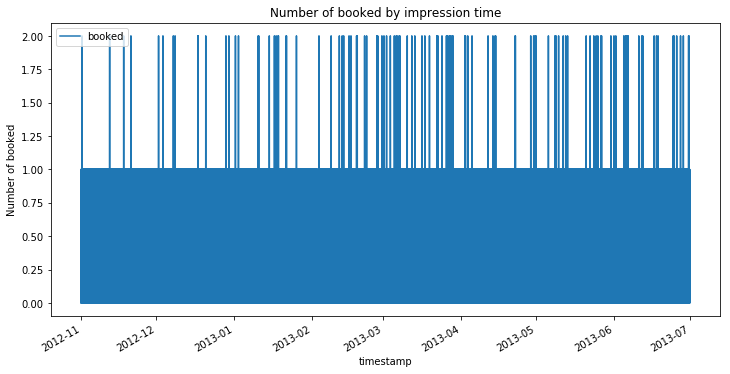

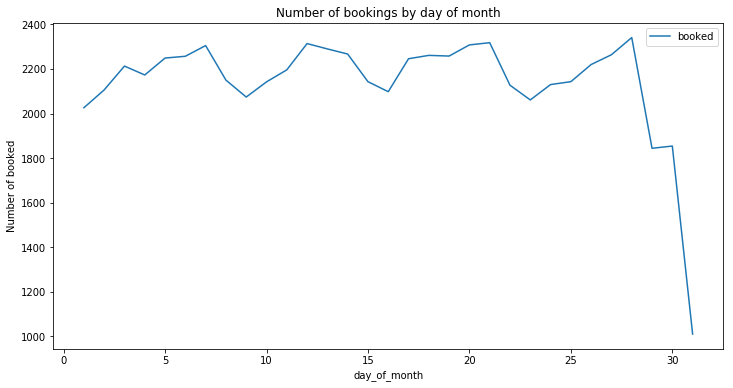

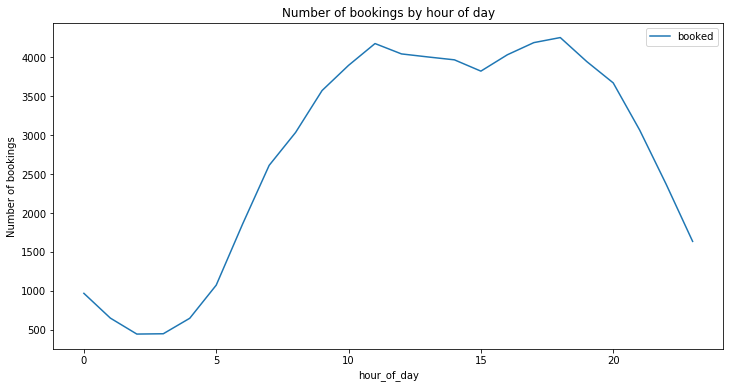

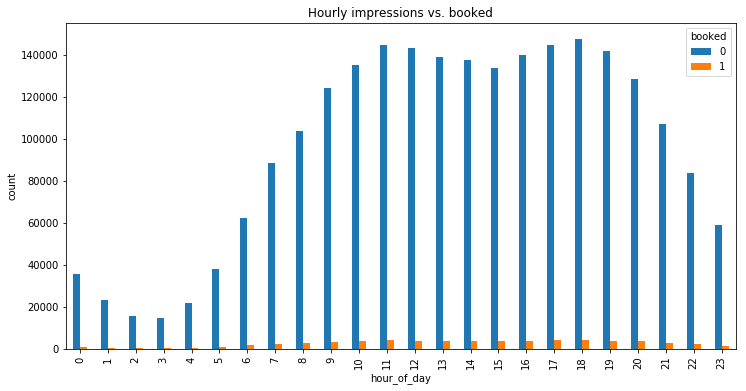

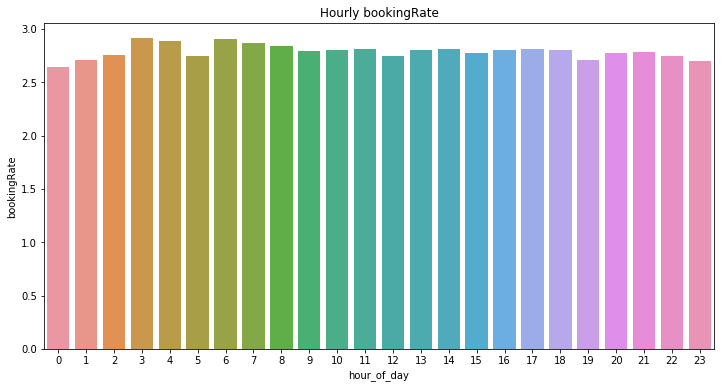

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead


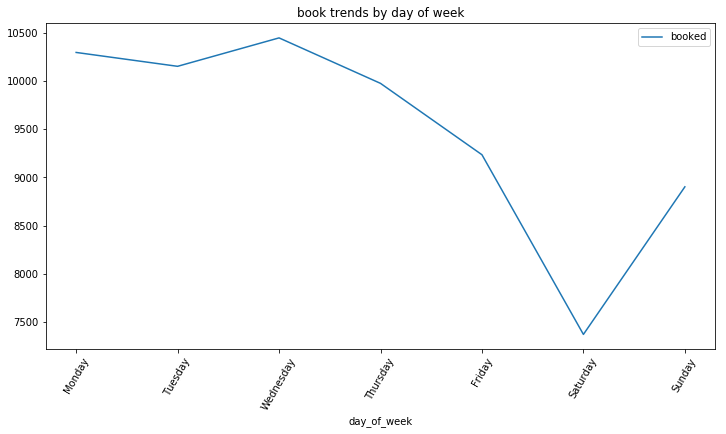

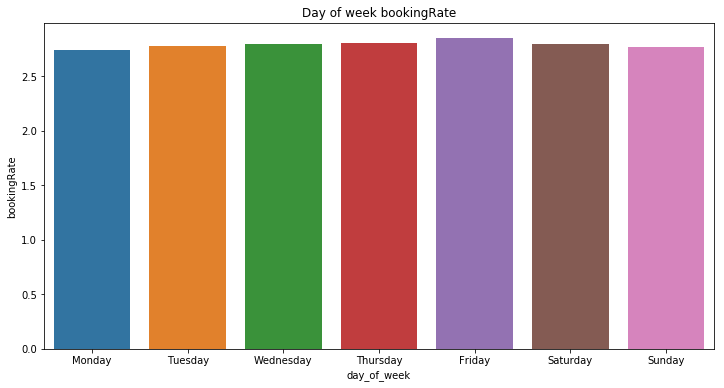

   hour_of_day  bookingRate
0            0     2.642703
1            1     2.709790
2            2     2.756489
3            3     2.912056
4            4     2.884829


(    hour_of_day  bookingRate
 0             0     2.642703
 1             1     2.709790
 2             2     2.756489
 3             3     2.912056
 4             4     2.884829
 5             5     2.743365
 6             6     2.905633
 7             7     2.870677
 8             8     2.838518
 9             9     2.792606
 10           10     2.800259
 11           11     2.807206
 12           12     2.742988
 13           13     2.800392
 14           14     2.808834
 15           15     2.775922
 16           16     2.800019
 17           17     2.812626
 18           18     2.799555
 19           19     2.709311
 20           20     2.775866
 21           21     2.784465
 22           22     2.750154
 23           23     2.700650,   day_of_week  bookingRate
 0      Friday     2.848437
 1      Monday     2.738356
 2    Saturday     2.794946
 3      Sunday     2.772691
 4    Thursday     2.802922
 5     Tuesday     2.776692
 6   Wednesday     2.795457)

In [130]:
# Number of bookings by day of month, day of week, hour of day, and at each timestamp
plot_timestamp(data1,'book',1,1,1,1)

Click Through Rates:

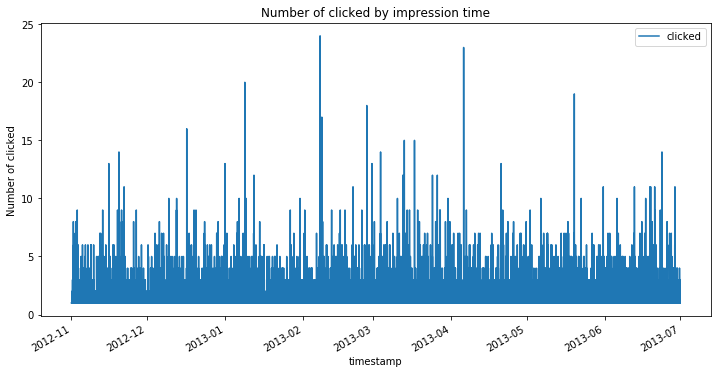

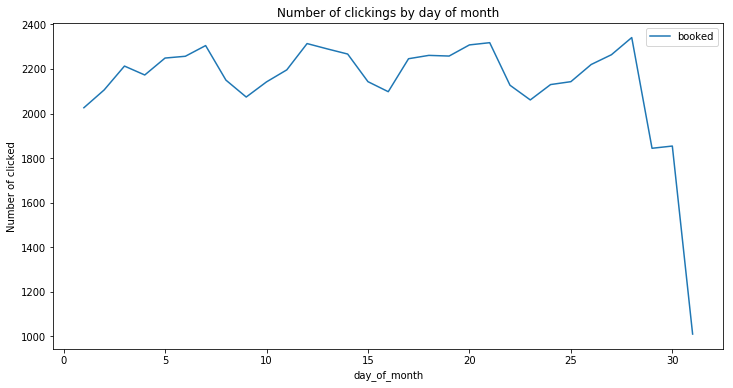

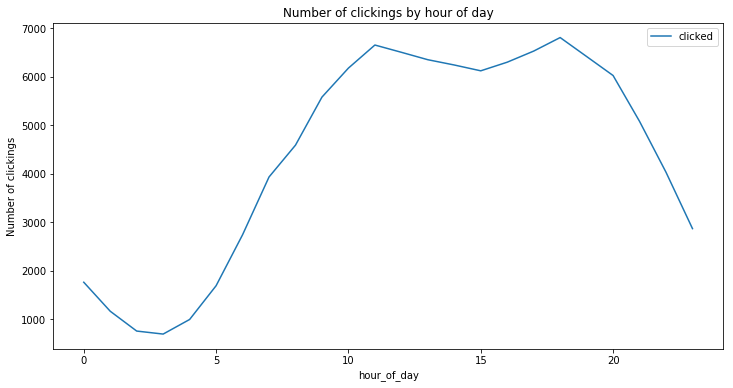

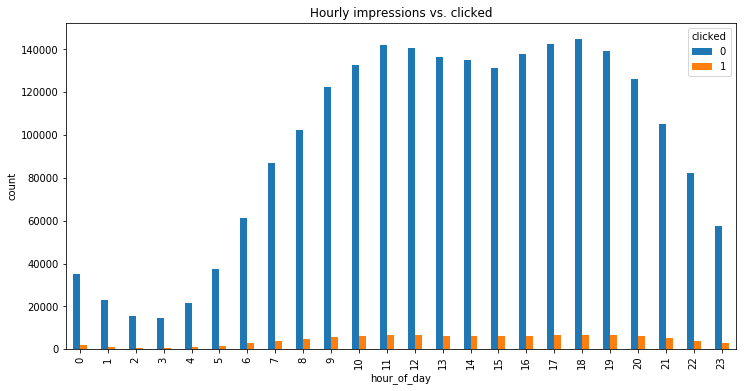

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead


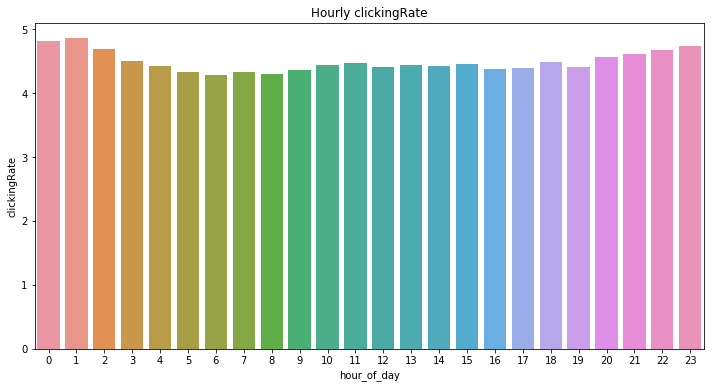

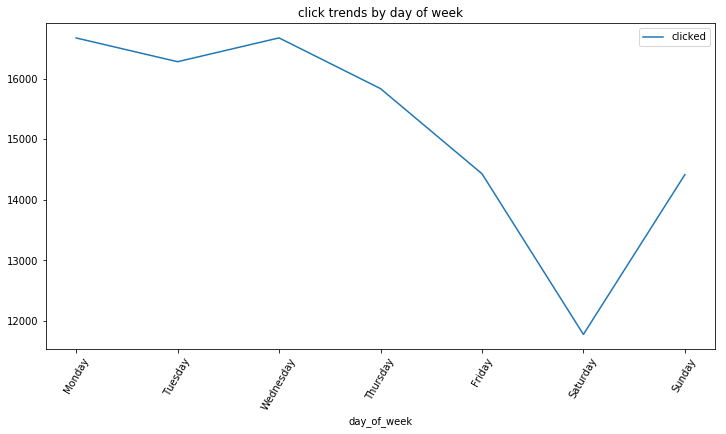

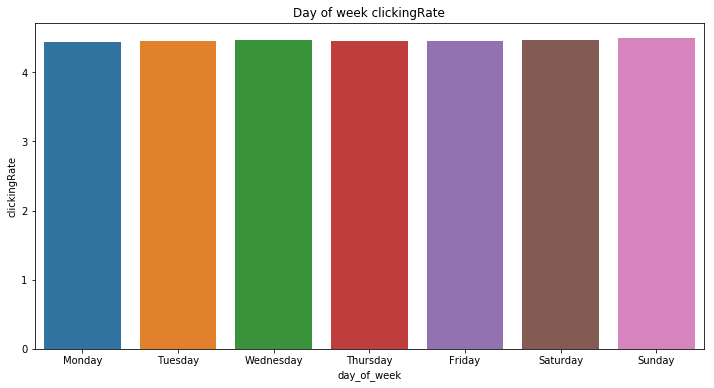

In [119]:
# Number of clicks by day of month, day of week, hour of day, and at each timestamp
plot_timestamp(data1,'click',1,1,1,1)

Conversion rates:

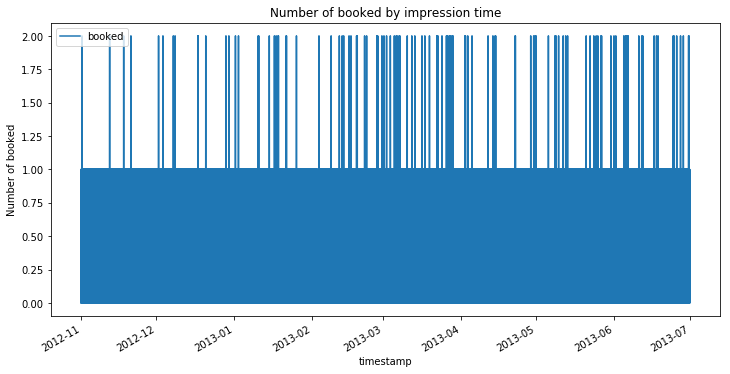

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


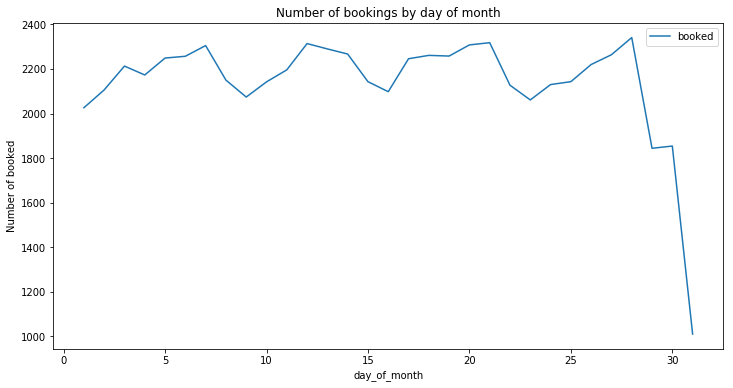

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


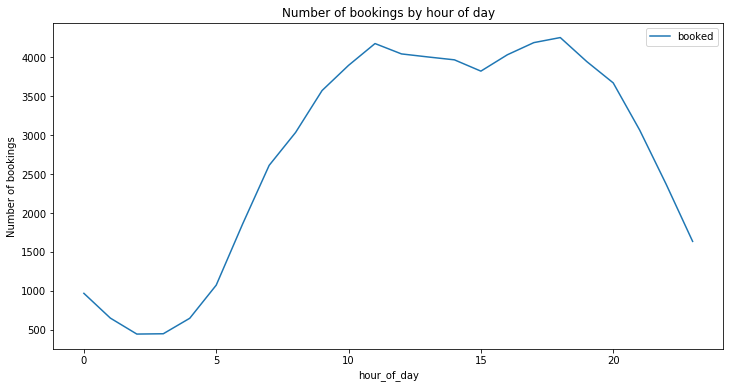

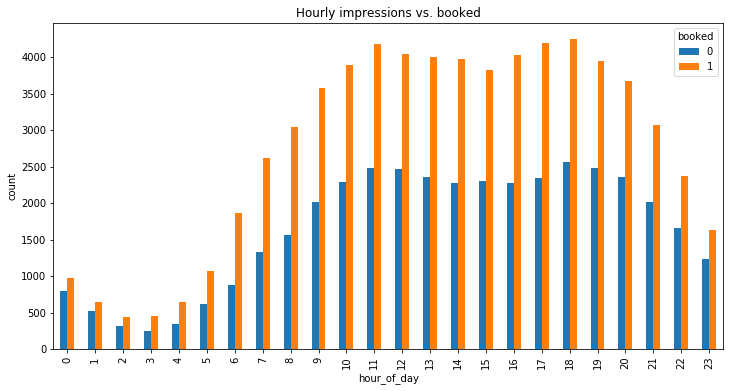

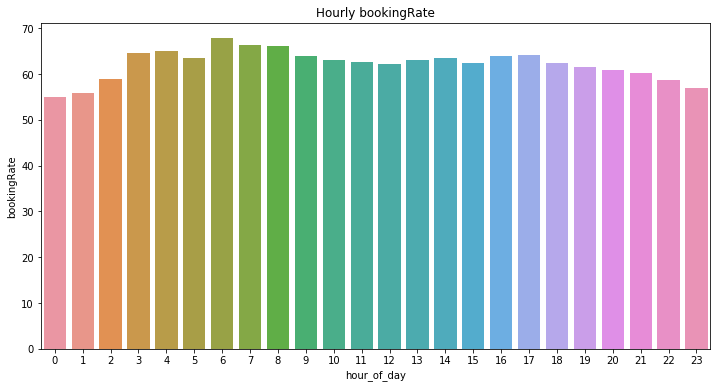

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


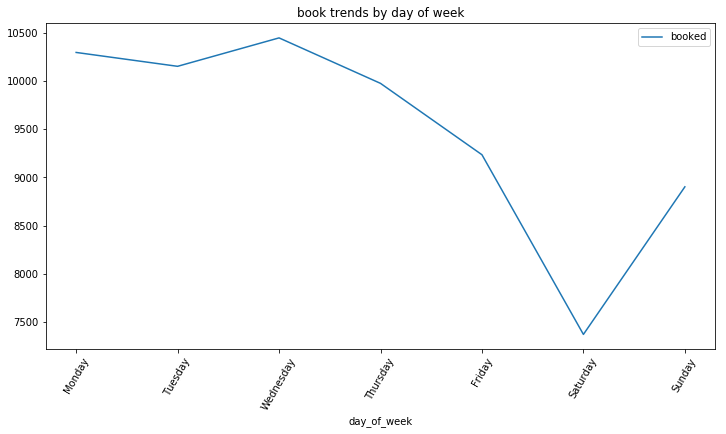

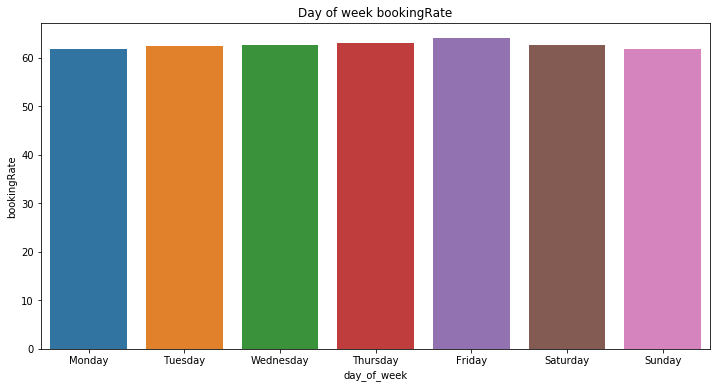

   hour_of_day  bookingRate
0            0    54.900850
1            1    55.784062
2            2    58.839050
3            3    64.655172
4            4    65.095286


In [129]:
conversion_h,conversion_w=plot_timestamp(data1.loc[data1['clicked']==1],'book',1,1,1,1)

Conversion rates tend to be slightly higher in morning and evening hours of the day. <br>
Friday is slightly more favourable than the rest of the week days

In [138]:
# Testing association between listing's stars and reviews with click rates and conversion rates
from functools import reduce

data1['hour_of_day']=data1['timestamp'].apply(lambda x :x.hour)
data1['day_of_week']=data1['timestamp'].apply(lambda x :x.weekday_name)

def conversion(df):
    return df['booked'].sum()/len(df)

def clickthrough(df):
    return df['clicked'].sum()/len(df)

# Hourly and weekly conversion,clickthrough rates
data2 = data1.loc[data1['clicked']==1].copy()
conversion_df_h = data2.groupby('hour_of_day').apply(conversion).reset_index()
clickthrough_df_h = data1.groupby('hour_of_day').apply(clickthrough).reset_index()
conversion_df_w = data2.groupby('day_of_week').apply(conversion).reset_index()
clickthrough_df_w = data1.groupby('day_of_week').apply(clickthrough).reset_index()

# Hourly and weekly average review scores, stars
listing_review_score_df_h = data1.groupby('hour_of_day').agg({'listing_review_score':'mean'}).reset_index()
listing_stars_df_h = data1.groupby('hour_of_day').agg({'listing_stars':'mean'}).reset_index()
listing_review_score_df_w = data1.groupby('day_of_week').agg({'listing_review_score':'mean'}).reset_index()
listing_stars_df_w = data1.groupby('day_of_week').agg({'listing_stars':'mean'}).reset_index()

h_dfs=[conversion_df_h,clickthrough_df_h,listing_review_score_df_h,listing_stars_df_h]
w_dfs = [conversion_df_w,clickthrough_df_w,listing_review_score_df_w,listing_stars_df_w]

hourly = reduce(lambda x,y: x.merge(y,on='hour_of_day'),h_dfs)
weekly = reduce(lambda x,y: x.merge(y,on='day_of_week'),w_dfs)

hourly.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 57 columns):
search_id                         int64
timestamp                         datetime64[ns]
site_id                           int64
user_country_id                   int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                int64
listing_id                        int64
listing_stars                     int64
listing_review_score              float64
is_brand                          int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                  int64
price_usd                         float64
has_promotion                     int64
destination_id                    int64
length_of_stay                    int64
booking_window                    int64
num_adults                        int64
num_kids                

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  import sys


,hour_of_day,0_x,0_y,listing_review_score,listing_stars
0,0,0.549008,0.048136,3.681694,3.370578
1,1,0.557841,0.048576,3.706445,3.403139
2,2,0.588391,0.046848,3.700904,3.391842
3,3,0.646552,0.045040,3.752642,3.350482
4,4,0.650953,0.044317,3.740383,3.190737


In [144]:
hourly.iloc[:,1:].corr()

,0_x,0_y,listing_review_score,listing_stars
0_x,1.000000,-0.938749,0.848485,-0.795482
0_y,-0.938749,1.000000,-0.907506,0.913789
listing_review_score,0.848485,-0.907506,1.000000,-0.908139
listing_stars,-0.795482,0.913789,-0.908139,1.000000


In [205]:
weekly.iloc[:,1:].corr()
del data1
gc.collect()

NameError: name 'data1' is not defined

- For hourly rates:

Conversion rates and listing review score have a high pearson correlation of 0.85 <br>
Conversion rates and listing stars have a negative correlation of -0.8 <br>
Click through rates and listing review score have an even higher but negative correlation of -0.91 <br>
Click through rates and listing stars have a correlation of 0.91 <br>

- For weekly rates:

Conversion rates and listing review score have a high pearson correlation of 0.95 <br>
Conversion rates and listing stars have a negative correlation of -0.56 <br>
Click through rates and listing review score have correlation of -0.13 <br>
Click through rates and listing stars have a correlation of 0.85 <br>

In [335]:
### Click through and conversion rates by listing_id
ctr = data.groupby('listing_id').apply(clickthrough).to_frame() # click through rate
stars_reviews = data.groupby('listing_id').agg({'listing_stars':'mean','listing_review_score':'mean'})
ctr_stars = ctr.join(stars_reviews)
print(ctr_stars.head())

conv = data.loc[data['clicked']==1].groupby('search_id').apply(conversion).to_frame()  # Conversion rate
conv_stars = conv.join(stars_reviews)
print(conv_stars.head())

                   0
listing_id          
1           0.027027
2           0.000000
3           0.057143
4           0.071429
5           0.000000
                   0  listing_stars  listing_review_score
listing_id                                               
1           0.027027              2                   0.0
2           0.000000              0                   4.0
3           0.057143              3                   3.5
4           0.071429              5                   4.5
5           0.000000              0                   0.0
             0  listing_stars  listing_review_score
search_id                                          
4          0.0            5.0                   4.5
28         1.0            1.0                   0.0
30         1.0            3.0                   3.5
44         1.0            NaN                   NaN
61         0.0            4.0                   0.0


In [396]:
# Statistical tests #
#Performing ANOVA on click-through rates and conversion-rates, independent variables are listing_stars and listing_review_score

# click-through rates vs listing_stars

#!python -m pip uninstall patsy==0.5.0 -y --no-cache-dir
#!python -m pip install --upgrade patsy --no-cache-dir
import patsy
print(patsy.__version__)
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi


ctr_stars.columns = ['ctr','listing_stars','listing_review_score']
conv_stars.columns = ['conv','listing_stars','listing_review_score']

dep = ['ctr','conv'] 
indep = ['listing_stars','listing_review_score']
combs=[(x,y) for x in dep for y in indep]

for i in range(len(combs)):
    formula = '{} ~ C({})'.format(combs[i][0],combs[i][1])
    if combs[i][0]=='ctr':
        data=ctr_stars.dropna() 
    else:
        data=conv_stars.dropna() 
    print(formula)
    m = smf.ols(formula, data=data).fit()
    if(m.f_pvalue<0.05):
        mc = multi.MultiComparison(ctr_stars['ctr'],ctr_stars['listing_stars'])
        res = mc.tukeyhsd()
        print("There is a significant difference between levels of listing_stars. Here is the post-hoc test for listing_stars: \n",res.summary(),end='\n')

0.5.0
ctr ~ C(listing_stars)


AssertionError: 

[('ctr', 'listing_stars'),
 ('ctr', 'listing_review_score'),
 ('conv', 'listing_stars'),
 ('conv', 'listing_review_score')]

In [397]:
# function for preparing data
def prep_data(data,ffm=0):
    # Variables to drop
    missingval_cols = data.columns[data.isna().sum()/data.shape[0]>0.8].values # Drop variables with >80% missing values
    col_to_drop = ['listing_position','booking_value','booked','timestamp','search_id']+[c for c in data.columns if 'competitor' in c]+list(missingval_cols) 
    maybe_useful=['competitor1_price_percent_diff', 'competitor3_price_percent_diff', 'competitor4_price_percent_diff', 'competitor5_price_percent_diff', 'competitor6_price_percent_diff', 'competitor7_price_percent_diff', 'competitor8_price_percent_diff']
    
    if ffm==1:
        col_to_drop = list(set(col_to_drop))
        col_to_drop = [c for c in col_to_drop if c not in maybe_useful]
        #print(col_to_drop)
    # Adding hour encodings as the correlations with review scores and stars is high
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['hour_of_day']=data['timestamp'].apply(lambda x :x.hour)
    # Adding hourly averages of listing_review_score and listing_stars
    listing_review_score_df_h = data.groupby('hour_of_day').agg({'listing_review_score':'mean'}).reset_index()
    listing_review_score_df_h.columns = ['hour_of_day','listing_review_score_avg']
    listing_stars_df_h = data.groupby('hour_of_day').agg({'listing_stars':'mean'}).reset_index()
    listing_stars_df_h.columns = ['hour_of_day','listing_stars_avg']
    h_dfs = reduce(lambda x,y: x.merge(y,on='hour_of_day'),[listing_review_score_df_h,listing_stars_df_h])
    data = h_dfs.merge(data,on='hour_of_day').drop(['listing_review_score','listing_stars'],axis=1)
    # Dropping selected variables
    data = data.drop(col_to_drop,axis=1)
    # Selected features for modelling
    print("Selected features for modelling \n",data.columns)
    print("Missing values %")
    print(data.isna().sum()/data.shape[0])
    
    from scipy import stats

    # Doing mode imputation for missing values as these variables are non-normal (exponential in fact)
    if ffm==0:
        m1=stats.mode(data['location_score2'].dropna())[0][0]
        m2=stats.mode(data['distance_to_dest'].dropna())[0][0]
        data['location_score2'] = np.where(data['location_score2'].isnull(),m1,data['location_score2'])
        data['distance_to_dest'] = np.where(data['distance_to_dest'].isnull(),m2,data['distance_to_dest'])
        print("Missing values imputed")
    return data

## Model fitting

- 'booking_value' cannot be chosen as dependent variable as it has several missing values <br>
We choose 'clicked' as the target, as the class imbalance is a little lower than in 'booked' <br>

- After doing a 75-25 train-test split,
we will add target encoding on high cardinality categories such as 'hours_of_day','user_country_id','listing_country_id',etc

- This encoding is done to make these variables directly linked to the target variable, hence enhancing their predictive powers. Also, it preserves the feature space, which otherwise would have more than doubled if one-hot encoding was used

- Median imputation is applied on the two variables with missing values, as the variables' distribution is non-normal and highly skewed

In [259]:
from sklearn import metrics, preprocessing, model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score, classification_report,roc_curve
#from catboost import CatBoostClassifier,Pool, cv
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [294]:
train,test = train_test_split(data,test_size=0.25,random_state = 1991,stratify=data['clicked'])
print(train.shape,test.shape)

(1785417, 54) (595140, 54)


In [289]:
train=prep_data(train)
test=prep_data(test)

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Selected features for modelling 
 Index(['hour_of_day', 'listing_review_score_avg', 'listing_stars_avg',
       'search_id', 'site_id', 'user_country_id', 'listing_country_id',
       'listing_id', 'is_brand', 'location_score1', 'location_score2',
       'log_historical_price', 'price_usd', 'has_promotion', 'destination_id',
       'length_of_stay', 'booking_window', 'num_adults', 'num_kids',
       'num_rooms', 'stay_on_saturday', 'distance_to_dest', 'random_sort',
       'clicked'],
      dtype='object')
Missing values %
hour_of_day                 0.000000
listing_review_score_avg    0.000000
listing_stars_avg           0.000000
search_id                   0.000000
site_id                     0.000000
user_country_id             0.000000
listing_country_id          0.000000
listing_id                  0.000000
is_brand                    0.000000
location_score1             0.000000
location_score2             0.220962
log_historical_price        0.000000
price_usd                  

KeyboardInterrupt: 

In [216]:
# target mean encoding function
def mean_encoder(df, cat_var, target, alpha = 0.5):
    P_c = df.groupby(cat_var)[target].transform('mean')
    P_global = df[target].mean()
    n_c = df.groupby(cat_var)[target].transform('count')
    enc = (P_c*n_c + P_global*alpha)/(n_c + alpha) # alpha for regularization to prevent target leaking
    temp = df[[cat_var]]
    temp['enc'] = enc
    return temp.groupby(cat_var).mean()


In [217]:
# Out of fold encoding 
categoricals = ['hour_of_day', 'search_id', 'site_id', 'user_country_id', 'listing_country_id',
               'listing_id','destination_id']# getting mean encoding features
cvlist = list(KFold(n_splits = 10, random_state = 1).split(train))
for var in categoricals:
    mean_enc_var = np.zeros(len(train))
    for tr_idx, val_idx in cvlist:
        X_tr, X_val = train.loc[tr_idx], train.loc[val_idx]
        X_tr_mean = mean_encoder(X_tr, var, 'clicked')
        mean_enc_var[val_idx] = X_val[var].map(X_tr_mean['enc'])
        train[f'mean_enc_{var}'] = mean_enc_var
    train[f'mean_enc_{var}'] = train[f'mean_enc_{var}'].fillna(train[f'mean_enc_{var}'].mean())
    test[f'mean_enc_{var}'] = test[var].map(mean_encoder(train,var,'clicked')['enc'])
    test[f'mean_enc_{var}'] = test[f'mean_enc_{var}'].fillna(train[f'mean_enc_{var}'].mean())

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- F1 score is the harmonic mean of precision and recall<br>
F1 score  = 2$*$Precision$*$Recall/(Precision+Recall)                --> Balance of Precision and Recall<br>
Precision = True Positives / (True Positives + False Positives)  --> proportion of predictions correctly made<br>
Recall = True Positives / (True Positives + False Negatives)     --> proportion of ground truth correctly discovered<br>

- This metric is a far more robust instrument to evaluate our model than accuracy because of imbalanced classes<br>
- TPR (True Positive Rate) vs FPR (False Positive Rate) for thresholds from range 0-1 gives ROC(curve)<br>
AUC (Area Under Curve) of ROC reflects the robustness of the model in terms of confidence in our probability predictions<br>
An AUC of 0.5 reflects a random model which is as good as an unbiased coin flip <br>
Higher the AUC, the better<br><br>
- We will use ROC AUC as the standard metric to evaluate our models

In [277]:
# Applying logistic regression with default parameters

logistic = LogisticRegression().fit(train.drop(['clicked'],axis=1),train['clicked'])                                         

/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

In [280]:
log_preds=logistic.predict(test.drop(['clicked'],axis=1))
print(classification_report(test['clicked'], log_preds))
roc_curve(test['clicked'], log_preds)
print("ROC AUC score ",roc_auc_score(test['clicked'],log_preds))  

/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    568616
           1       0.00      0.00      0.00     26524

   micro avg       0.96      0.96      0.96    595140
   macro avg       0.48      0.50      0.49    595140
weighted avg       0.91      0.96      0.93    595140

ROC AUC score  0.5


/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Logistic regression with default settings gives an ROC AUC of 0.5, which is as good as random guessing
- F1 score for 0 is 98%, whereas for 1 it is 0%
- We will try optimizing hyperparameters using grid search:

In [281]:
# Logistic regression with grid search

logistic = LogisticRegression()
penalty = ['l1', 'l2']
C = np.logspace(0, 3, 3)
param_grid=dict(C=C, penalty=penalty)

clf = GridSearchCV(cv=3,estimator=logistic, param_grid=param_grid,
                  scoring='roc_auc') # evaluating on roc auc score
clf.fit(train.drop('clicked',axis=1), train['clicked'])        

/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([   1.     ,   31.62278, 1000.     ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [285]:
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])

print("Score of best model on train data: ",clf.best_score_)  

#cross_val_score(clf, train.drop('clicked',axis=1), train['clicked']) # Nested cross validation score   

# Evaluating on test set
test_preds=clf.predict(test.drop(['clicked'],axis=1))

print("Evaluating logistic regression on test set: ")
print(classification_report(test['clicked'], test_preds))
roc_curve(test['clicked'], test_preds)
print("ROC AUC score ",roc_auc_score(test['clicked'],test_preds))

Best Penalty: l1
Best C: 1000.0
Score of best model on train data:  0.6720611395181478
Evaluating logistic regression on test set: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    568616
           1       0.45      0.00      0.00     26524

   micro avg       0.96      0.96      0.96    595140
   macro avg       0.70      0.50      0.49    595140
weighted avg       0.93      0.96      0.93    595140

ROC AUC score  0.5010659808476128


- Logistic regression after performing grid search over a hyperparameter space, and fine tuned after 3-fold cross validation with f1 score as evaluation metric gives the following results: <br>

ROC AUC on train data is 67.2% <br>
F1 scores are still the same <br>
ROC AUC on test data is 50.1%, a 0.1% increase from before <br>
- It is hard to find the optimal region of hyperparameters using grid search when there are very few optimal regions in the hyperparameter space.<br><br>

- We will now use gradient boosting to fit the data more deeply


In [246]:
# LightGBM (Gradient Boosted Trees)

roc_list=[]
y_pred_tot=[]
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1991)
i=1
train1 = train.drop(['clicked'],axis=1)
for train_index, test_index in fold.split(train1,train['clicked']):
    X_train, X_test = train1.iloc[train_index], train1.iloc[test_index]
    print(X_train.shape,X_test.shape)
    y_train, y_test = train['clicked'][train_index], train['clicked'][test_index]
    model=LGBMClassifier(n_estimators=3000,random_state=1991,learning_rate=0.03,colsample_bytree=0.2,objective='binary',scale_pos_weight=1)
    model.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200) # Evaluating on ROC AUC
    preds=model.predict_proba(X_test)[:,-1]
    print("auc: ",roc_auc_score(y_test,preds))
    roc_list.append(roc_auc_score(y_test,preds))
    p = model.predict_proba(test.drop(['clicked'],axis=1))[:,-1]
    i=i+1
    y_pred_tot.append(p)                                                 

(1606875, 30) (178542, 30)
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.725017	valid_0's binary_logloss: 0.168014
[400]	valid_0's auc: 0.731347	valid_0's binary_logloss: 0.166075
[600]	valid_0's auc: 0.734004	valid_0's binary_logloss: 0.165456
[800]	valid_0's auc: 0.73563	valid_0's binary_logloss: 0.165126
[1000]	valid_0's auc: 0.737024	valid_0's binary_logloss: 0.164887
[1200]	valid_0's auc: 0.737893	valid_0's binary_logloss: 0.164736
[1400]	valid_0's auc: 0.738277	valid_0's binary_logloss: 0.164676
[1600]	valid_0's auc: 0.738554	valid_0's binary_logloss: 0.164627
[1800]	valid_0's auc: 0.738808	valid_0's binary_logloss: 0.164572
[2000]	valid_0's auc: 0.738918	valid_0's binary_logloss: 0.164556
[2200]	valid_0's auc: 0.739128	valid_0's binary_logloss: 0.164521
Early stopping, best iteration is:
[2122]	valid_0's auc: 0.73914	valid_0's binary_logloss: 0.164521
auc:  0.7391403427770781
(1606875, 30) (178542, 30)
Training until validation scores don't

auc:  0.7445243350669182
(1606876, 30) (178541, 30)
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.728803	valid_0's binary_logloss: 0.167889
[400]	valid_0's auc: 0.735503	valid_0's binary_logloss: 0.16581
[600]	valid_0's auc: 0.738777	valid_0's binary_logloss: 0.165091
[800]	valid_0's auc: 0.740951	valid_0's binary_logloss: 0.164673
[1000]	valid_0's auc: 0.742411	valid_0's binary_logloss: 0.164414
[1200]	valid_0's auc: 0.743669	valid_0's binary_logloss: 0.16421
[1400]	valid_0's auc: 0.744127	valid_0's binary_logloss: 0.164128
[1600]	valid_0's auc: 0.744381	valid_0's binary_logloss: 0.164073
[1800]	valid_0's auc: 0.744563	valid_0's binary_logloss: 0.164038
[2000]	valid_0's auc: 0.744557	valid_0's binary_logloss: 0.164033
Early stopping, best iteration is:
[1849]	valid_0's auc: 0.74461	valid_0's binary_logloss: 0.164027
auc:  0.7446096005607121


In [273]:
gbm_preds=np.mean(y_pred_tot,axis=0)
avg_auc=np.mean(roc_list,axis=0)   
print("Average ROC AUC over train data: ",avg_auc)
print("Evaluating LightGBM on test set: ")
print(classification_report(test['clicked'], (gbm_preds>0.11).astype('int')))
print("ROC AUC score ",roc_auc_score(test['clicked'],gbm_preds))   

# Plotting ROC

fpr, tpr, threshold = roc_curve(test['clicked'], gbm_preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Average ROC AUC over train data:  0.7436410899150643
Evaluating LightGBM on test set: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    568616
           1       0.29      0.41      0.34     26524

   micro avg       0.93      0.93      0.93    595140
   macro avg       0.63      0.68      0.65    595140
weighted avg       0.94      0.93      0.93    595140

ROC AUC score  0.8817227285115525


- Logistic regression is a standard choice of model for a classification task. It is easy to implement and gives a quick overview of predictive power of our data.
- LightGBM uses gradient boosted trees in order to iteratively learn from past error terms by updating the model (boosting) over the initial tree model, aiming to reduce the error term in  every iteration.
It is a widely used boosting algorithm for optimizing the predictive power of tree based models. 

- LightGBM is providing an average AUC of 74.3% on train data, and 88.1% on test data
- After optimizing the threshold to 0.11, we get an F1 score of 96% for 0 (no click), and 34 % for 1 (click)
- This is a much better result when compared to the scores when threshold was at default (0.5)
- High AUC values give us the confidence that we can find a threshold where we will be able to make reliable predictions for target variable


- If the model gets too complex to explain in simple terms, we can explain the model through feature importances extracted from tree based methods.<br>
- Partial Dependence Plots between target (predicted propabilities) vs predictor variables can be plotted, which help in visualizing their relationships.<br> Target value (probability) is predicted for increasing values of the predictor, while all other data is kept constant.<br> We then plot the predicted values over changing values of this predictor to get the PDP.<br> This may be repeated several times, and average values be plotted instead of absolute ones.<br>
- Permutation importances can be calculated for each feature, which is obtained by shuffing the feature in question, and making predictions. The Increase in loss due to shuffling will determine the importance of the feature.


## Field Aware Factorization Machines

- Factorization helps to extract the most important latent or hidden features from the existing raw ones
- Factorization helps in representing  approximately the same relationship between the target and predictors using a lower dimension dense matrix
- In FFMs, each feature has several latent vectors

In [402]:
#!pip install xlearn
import xlearn as xl

# Function for converting to FFM data
def convert_to_ffm(df,type,numerics,categories,features):
    currentcode = len(numerics)
    catdict = {}
    catcodes = {}
    
    # Flagging categorical and numerical fields
    for x in numerics:
         catdict[x] = 0
    for x in categories:
         catdict[x] = 1
    
    nrows = df.shape[0]
    ncolumns = len(features)
    with open(str(type) + "_ffm.txt", "w") as text_file:
    
    # Looping over rows to convert each row to libffm format
        for n, r in enumerate(range(nrows)):
             datastring = ""
             datarow = df.iloc[r].to_dict()
             datastring += str(int(datarow['clicked'])) # Set Target Variable here
             
            # For numerical fields, we are creating a dummy field here
             for i, x in enumerate(catdict.keys()):
                 if(catdict[x]==0):
                     datastring = datastring + " "+str(i)+":"+ str(i)+":"+ str(datarow[x])
                 else:
            
            # For a new field appearing in a training example
                     if(x not in catcodes):
                         catcodes[x] = {}
                         currentcode +=1
                         catcodes[x][datarow[x]] = currentcode #encoding the feature
             
            # For already encoded fields
                     elif(datarow[x] not in catcodes[x]):
                         currentcode +=1
                         catcodes[x][datarow[x]] = currentcode #encoding the feature
                     
                     code = catcodes[x][datarow[x]]
                     datastring = datastring + " "+str(i)+":"+ str(int(code))+":1"

             datastring += '\n'
             text_file.write(datastring)

     |████████████████████████████████| 4.9MB 567kB/s eta 0:00:01
  Stored in directory: /home/divyansh/.cache/pip/wheels/59/7d/71/699578f3cb69f16a2e5f648d978259dba959c92a5a6eca9451
Successfully built xlearn


df $=$ Dataframe to be converted to ffm format <br>

Type $=$ ‘Train’ $/$ ‘Test’ <br>

Numerics $=$ list of all numeric fields <br>

Categories $=$ list of all categorical fields <br>

Features $=$ list of all features except the Label and Id <br>

In [398]:
train1=prep_data(train,1)
test1=prep_data(test,1)

print(train1.shape,test1.shape)

['competitor1_has_availability', 'user_hist_stars', 'competitor7_rate', 'search_id', 'competitor8_has_availability', 'booking_value', 'competitor6_has_availability', 'competitor5_has_availability', 'competitor6_rate', 'competitor5_rate', 'competitor4_rate', 'booked', 'competitor3_rate', 'competitor3_has_availability', 'competitor2_has_availability', 'competitor2_price_percent_diff', 'log_click_proportion', 'timestamp', 'competitor4_has_availability', 'listing_position', 'competitor2_rate', 'user_hist_paid', 'competitor7_has_availability', 'competitor1_rate', 'competitor8_rate']
Selected features for modelling 
 Index(['hour_of_day', 'listing_review_score_avg', 'listing_stars_avg',
       'site_id', 'user_country_id', 'listing_country_id', 'listing_id',
       'is_brand', 'location_score1', 'location_score2',
       'log_historical_price', 'price_usd', 'has_promotion', 'destination_id',
       'length_of_stay', 'booking_window', 'num_adults', 'num_kids',
       'num_rooms', 'stay_on_sat

In [399]:
Numerics = ['competitor1_price_percent_diff', 'competitor3_price_percent_diff',
       'competitor4_price_percent_diff', 'competitor5_price_percent_diff',
       'competitor6_price_percent_diff', 'competitor7_price_percent_diff',
       'competitor8_price_percent_diff','listing_review_score_avg', 'listing_stars_avg',
           'location_score1', 'location_score2','log_historical_price', 'price_usd','length_of_stay',
            'booking_window', 'num_adults', 'num_kids','num_rooms','distance_to_dest']
Categories = [c for c in train1.columns if c not in Numerics]
for cat in Categories:
    train1[cat] = train1[cat].astype('category')
    test1[cat] = test1[cat].astype('category')
Features = [1]
Type = 'train'

In [403]:
# Preparing data for FFM

convert_to_ffm(train1,'train',Numerics,Categories,Features)
convert_to_ffm(test1,'test',Numerics,Categories,Features)

In [404]:
# Training FFM

ffm_model = xl.create_ffm()

ffm_model.setTrain("train_ffm.txt")

param = {'task':'binary', 
         'lr':0.2,
         'lambda':0.002, 
         'metric':'acc'}

# Start to train
# The trained model will be stored in model.out
ffm_model.cv(param)

ffm_model.fit(param, './model.out')
ffm_model.cv(param)

# Prediction task
ffm_model.setTest("test_ffm.txt") # Test data
ffm_model.setSigmoid() # Convert output to 0-1

# Start to predict
# The output result will be stored in output.txt
ffm_model.predict("./model.out", "./output.txt")


In [409]:
preds = pd.read_csv('./output.txt', sep="/t", header=None)
preds.head()

/home/divyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
#To perform online learning on new dataset:

#ffm_model = xl.create_ffm()
#ffm_model.setTrain("data/train_ffm.txt")
#ffm_model.setValidate("data/test_ffm.txt")
#ffm_model.setPreModel("trained_models/model.out")
#param = {'task': 'binary', 'lr': 0.2, 'lambda': 0.002}
#ffm_model.fit(param, "trained_models/model.out")
